In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(clinical_df, mouse_df, on="Mouse ID", how = "outer")

# Display the data table for preview
merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupby_drug_timepoint = merge_df.groupby(["Drug","Timepoint"])
drug_timepoint_table = groupby_drug_timepoint['Tumor Volume (mm3)'].mean().reset_index()
drug_timepoint_table

# Convert to DataFrame
treatment_df = pd.DataFrame(drug_timepoint_table)
treatment_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
groupby_drug_timepoint = merge_df.groupby(["Drug","Timepoint"])
sem = groupby_drug_timepoint['Tumor Volume (mm3)'].sem().reset_index()
sem

# Convert to DataFrame
sem_treatment_df = pd.DataFrame(sem)

# Preview DataFrame
sem_treatment_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_treatment_df = pd.pivot_table(treatment_df, index="Timepoint",columns='Drug', 
                    values = 'Tumor Volume (mm3)')

pivot_treatment_df

pivot_sem_treatment_df = pd.pivot_table(sem_treatment_df, index="Timepoint",columns='Drug', 
                    values = 'Tumor Volume (mm3)')
pivot_sem_treatment_df



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


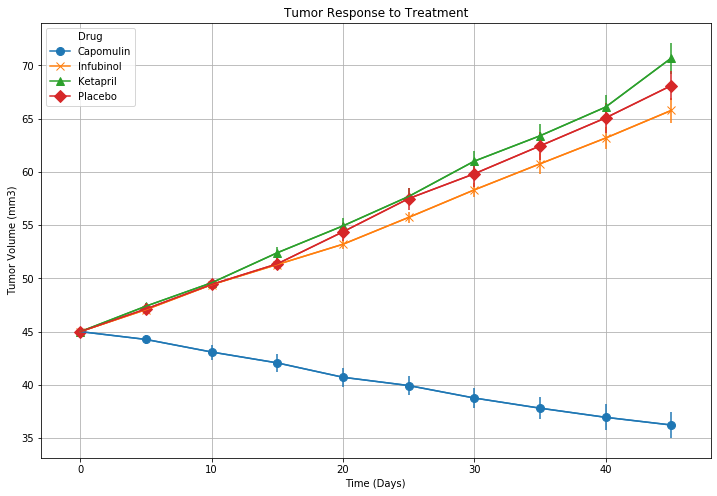

In [5]:
# filter to plot just four drugs only
pivot_treat_short = pivot_treatment_df.loc[:,['Capomulin',"Infubinol","Ketapril","Placebo"]]

pivot_sem_short = pivot_sem_treatment_df.loc[:,['Capomulin',"Infubinol","Ketapril","Placebo"]]

# plot with error bars
ax = pivot_treat_short.plot(figsize = (12,8),yerr=pivot_sem_short,legend=False)
ax.set_prop_cycle(None)
pivot_treat_short.plot(figsize=(12,8),style=['o-','x-','^-','D-'],markersize=8,ax=ax)

# make graph prettier
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (Days)")
ax.set_title("Tumor Response to Treatment")
ax.set_xlim(0-3, pivot_sem_short.tail(1).index.item()+3)
plt.grid()
plt.savefig('plots/01_Tumor Response to Treatment.png')


In [6]:
# show plot
plt.show()

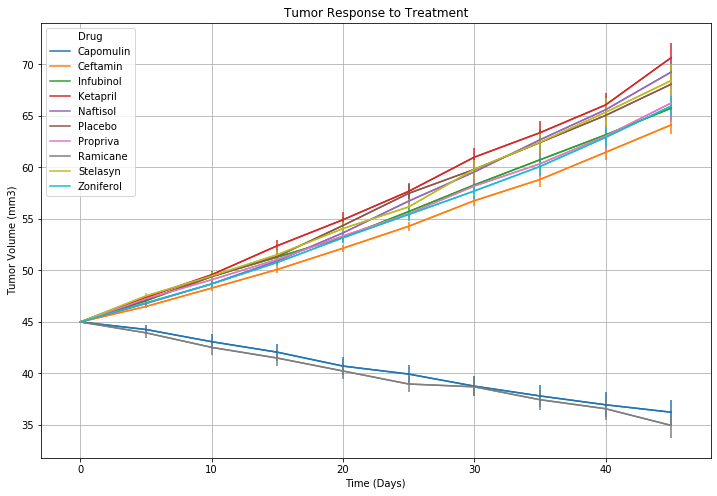

In [7]:
# plot to see all drugs for analysis
ax_all = pivot_treatment_df.plot(figsize = (12,8),yerr=pivot_sem_treatment_df,legend=False)
ax_all.set_prop_cycle(None)
pivot_treatment_df.plot(figsize=(12,8),markersize=8,ax=ax_all)
ax_all.set_ylabel("Tumor Volume (mm3)")
ax_all.set_xlabel("Time (Days)")
ax_all.set_title("Tumor Response to Treatment")
ax_all.set_xlim(0-3, pivot_sem_short.tail(1).index.item()+3)
plt.grid()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_groupby = merge_df.groupby(["Drug","Timepoint"])
meta_table = meta_groupby['Metastatic Sites'].mean().reset_index()
meta_table

# Convert to DataFrame
meta_df = pd.DataFrame(meta_table)
meta_df


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta = meta_groupby['Metastatic Sites'].sem().reset_index()
sem_meta

# Convert to DataFrame
sem_meta_df = pd.DataFrame(sem_meta)
sem_meta_df


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [10]:
# Minor Data Munging to Re-Format the Data Frames
pivot_meta_df = pd.pivot_table(meta_df, index="Timepoint",columns='Drug', 
                    values = 'Metastatic Sites')

pivot_sem_meta_df = pd.pivot_table(sem_meta_df, index="Timepoint",columns='Drug', 
                    values = 'Metastatic Sites')


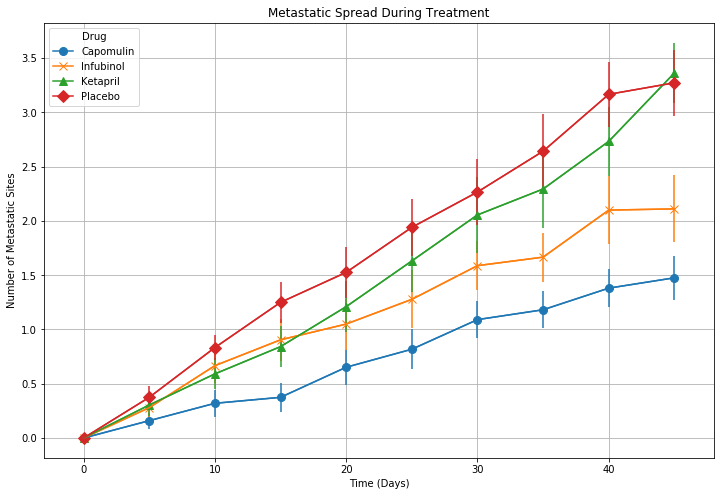

In [11]:
# filter to plot just four drugs
pivot_meta_short = pivot_meta_df.loc[:,['Capomulin',"Infubinol","Ketapril","Placebo"]]
pivot_meta_short

pivot_sem_meta_short = pivot_sem_meta_df.loc[:,['Capomulin',"Infubinol","Ketapril","Placebo"]]
pivot_sem_meta_short

# Generate plot with error bars
ax = pivot_meta_short.plot(figsize = (12,8),yerr=pivot_sem_meta_short,legend=False)
ax.set_prop_cycle(None)
pivot_meta_short.plot(figsize=(12,8),style=['o-','x-','^-','D-'],markersize=8,ax=ax)

# make graph prettier
ax.set_ylabel("Number of Metastatic Sites")
ax.set_xlabel("Time (Days)")
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlim(0-3, pivot_sem_meta_short.tail(1).index.item()+3)
plt.grid()

# Save the Figure
plt.savefig('plots/02_Metastatic Spread during Treatment.png')

# Show the Figure
plt.show()

Text(0.5, 1.0, 'Metastatic Spread During Treatment')

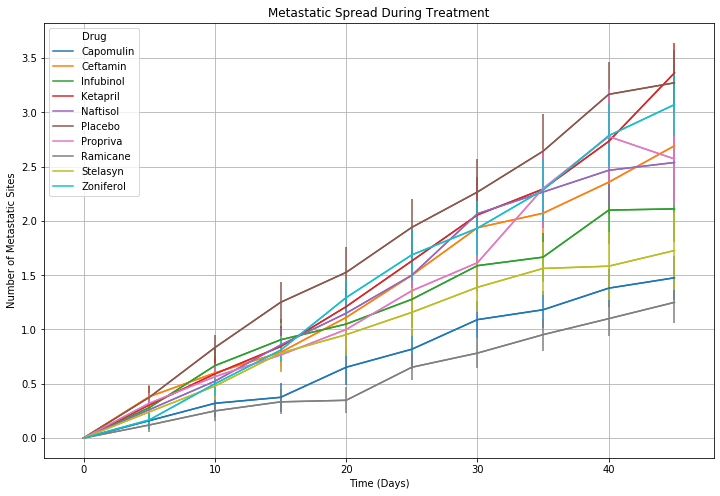

In [12]:
# Generate plot to show all drugs for analysis
ax_all = pivot_meta_df.plot(figsize = (12,8),yerr=pivot_sem_meta_df,legend=False)
ax_all.set_prop_cycle(None)
pivot_meta_df.plot(figsize=(12,8),markersize=8,ax=ax_all)
ax_all.set_xlim(0-3, pivot_sem_meta_short.tail(1).index.item()+3)
plt.grid()
ax_all.set_ylabel("Number of Metastatic Sites")
ax_all.set_xlabel("Time (Days)")
ax_all.set_title("Metastatic Spread During Treatment")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_groupby = merge_df.groupby(["Drug","Timepoint"])
mice_table = mice_groupby['Mouse ID'].count().reset_index()
mice_table

# Convert to DataFrame
mice_df = pd.DataFrame(mice_table)
mice_df


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [14]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_df = pd.pivot_table(mice_df, index="Timepoint",columns='Drug', 
                    values = 'Mouse ID')

# Preview the Data Frame
pivot_mice_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [15]:
# create list of drugs and for loop list comprehension to calculate percentages
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

perc_mice = pivot_mice_df
perc_mice_long = [round((perc_mice[each]/perc_mice.loc[0,each])*100,2) for each in drugs]
perc_mice_long

# create dataframe and transpose 
perc_mice_long_df = pd.DataFrame(perc_mice_long)
perc_mice_long_df = perc_mice_long_df.transpose()
perc_mice_long_df


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.85,92.0,73.08,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.00,92.0,69.23,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.46,84.0,61.54,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.62,80.0,46.15,56.0


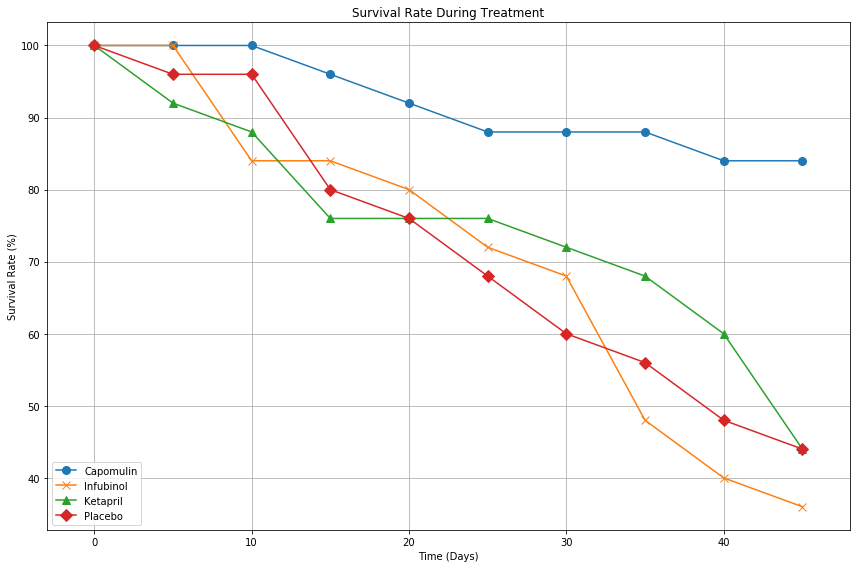

In [16]:
# Filter pivot for just the four drugs
pivot_mice_short = perc_mice_long_df.loc[:,['Capomulin',"Infubinol","Ketapril","Placebo"]]
pivot_mice_short

# Plot just the four drugs
fig, ax = plt.subplots()
pivot_mice_short.plot(figsize=(12,8),style=['o-','x-','^-','D-'],markersize=8,ax=ax)
ax.set_ylabel("Survival Rate (%)")
ax.set_xlabel("Time (Days)")
ax.set_title("Survival Rate During Treatment")
ax.set_xlim(0-3, pivot_mice_short.tail(1).index.item()+3)
plt.grid()
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig(('plots/03_Survival Rate during Treatment.png'))

In [17]:
# Show the Figure
plt.show()

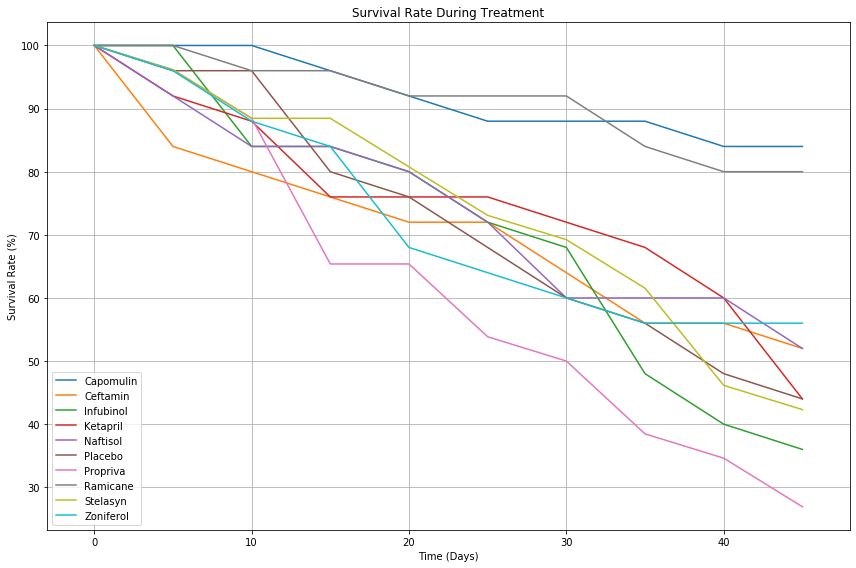

In [18]:
# Plot all drugs for analysis
fig, ax = plt.subplots()
perc_mice_long_df.plot(figsize=(12,8),markersize=8,ax=ax)
ax.set_ylabel("Survival Rate (%)")
ax.set_xlabel("Time (Days)")
ax.set_title("Survival Rate During Treatment")
ax.set_xlim(0-3, pivot_mice_short.tail(1).index.item()+3)
plt.grid()
plt.legend(loc="lower left")
plt.tight_layout()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
# rename table from above to perc_change
perc_change = pivot_treatment_df
perc_change

# store column names to new tuple
perc_change.columns
drugs_tested = ('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo','Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')

# list comprehension to calculate percentage change
perc_change_tuple = tuple(((perc_change.loc[(perc_change.tail(1).index.item()),each]-
                            perc_change.loc[(perc_change.head(1).index.item()),each])/
                           perc_change.loc[(perc_change.head(1).index.item()),each])*100 
                          for each in drugs_tested)
perc_change_tuple

# create df and reshape table
perc_change_table = {'Drugs Tested':drugs_tested, 'Percentage Change':perc_change_tuple}
perc_change_table
perc_change_df = pd.DataFrame(perc_change_table)
perc_change_df


,Drugs Tested,Percentage Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


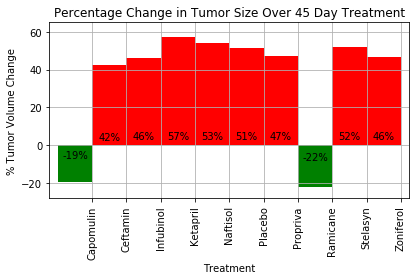

In [21]:
# create variable to store conditional statement for coloring bar graph based on values
mycolor=np.where(perc_change_df['Percentage Change']<0.0,'g','r')

# plot bar chart and also setting x_label using best practices
ind = np.arange(len(perc_change_df['Drugs Tested']))
fig, ax = plt.subplots()
rects = ax.bar(ind, perc_change_df['Percentage Change'],
        color=mycolor,
        align = 'edge',
        width = -1.0)
plt.xticks(ind, perc_change_df['Drugs Tested'], rotation=90)

# use autolabel method for labeling
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom # calculate height of each rectangle or bar within the chart

    for rect in rects:
        height = rect.get_height()
        label_position = height * 0.04 # calculate where value labels will be positioned based on percentage of bar height so it can be used for a wide range of values
        
        # set conditionals for negative values because some value labels will be placed under the 0 axis
        if label_position > 0:
            label_position
        else:
            label_position = height * 0.4 # multiply height value which is negative by bigger number so label will go under 0 axis using arbitrary value based on what looks ok
        
        ax.text(rect.get_x() + rect.get_width()/2., label_position, 
               '%d' % int(height) + '%', # formatting of value labels
               ha='center', va='bottom', fontsize = 10)

autolabel(rects, ax) # display labels on graph

# make graph pretty
plt.grid()
plt.xlim(-1.25,len(drugs_tested)-.75)
plt.ylim(perc_change_df["Percentage Change"].min()-6, perc_change_df["Percentage Change"].max()+8)
plt.xlabel("Treatment")
plt.ylabel("% Tumor Volume Change")
plt.title("Percentage Change in Tumor Size Over 45 Day Treatment")
plt.tight_layout()
# Save the Figure
plt.savefig(('plots/04_Percentage Change in Tumor Size Over 45 Day Treatment.png'))

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)